e.

The project involved analysis of the heart disease patient dataset with proper data processing. Then, different models were trained and and predictions are made with Random Forest,Logistic Regression 

I've used  Machine Learning algorithms, implemented in Python, to predict the presence of heart disease in a patient. This is a classification problem, with input features as a variety of parameters, and the target variable as a binary variable, predicting whether heart disease is present or not.

Machine Learning algorithms used:

* Logistic Regression (Scikit-learn)
* Random Forest (Scikit-learn)


## I. Importing essential libraries

In [184]:
#importing libriaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.ensemble as skle
from sklearn.model_selection import cross_val_score
pd.options.mode.chained_assignment = None
np.random.seed(100)



%matplotlib inline

import os

import warnings
warnings.filterwarnings('ignore')

## II. Importing and understanding the dataset

In [153]:
#reading the data
heart = pd.read_csv("/content/heart_2020_cleaned.csv")
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [154]:
#to find data set size 
heart.shape

(319795, 18)

In [202]:
#to check if there is any missing value 
heart.isnull().sum()


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [201]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   HeartDisease      319795 non-null  category
 1   BMI               319795 non-null  category
 2   Smoking           319795 non-null  category
 3   AlcoholDrinking   319795 non-null  category
 4   Stroke            319795 non-null  category
 5   PhysicalHealth    319795 non-null  category
 6   MentalHealth      319795 non-null  category
 7   DiffWalking       319795 non-null  category
 8   Sex               319795 non-null  category
 9   AgeCategory       319795 non-null  category
 10  Race              319795 non-null  category
 11  Diabetic          319795 non-null  category
 12  PhysicalActivity  319795 non-null  category
 13  GenHealth         319795 non-null  category
 14  SleepTime         319795 non-null  category
 15  Asthma            319795 non-null  category
 16  Ki

In [156]:
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [157]:

for i in heart.columns:
    heart[i] = heart[i].astype('category')
    print(heart[i].value_counts())

No     292422
Yes     27373
Name: HeartDisease, dtype: int64
26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
25.95       1
53.12       1
25.57       1
25.17       1
94.85       1
Name: BMI, Length: 3604, dtype: int64
No     187887
Yes    131908
Name: Smoking, dtype: int64
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64
No     307726
Yes     12069
Name: Stroke, dtype: int64
0.0     226589
30.0     19509
2.0      14880
1.0      10489
3.0       8617
5.0       7606
10.0      5453
15.0      5012
7.0       4629
4.0       4468
20.0      3216
14.0      2893
6.0       1270
25.0      1164
8.0        924
21.0       626
12.0       605
28.0       446
29.0       204
9.0        180
18.0       167
16.0       135
27.0       124
17.0       110
13.0        91
22.0        89
11.0        85
24.0        67
26.0        66
23.0        46
19.0        35
Name: PhysicalHealth, dtype: int64
0.0     205401
30.0     17373
2.0      16495
5.0      14149
10.0     105

we have no missing values and the dataset looks clean

In [158]:
heart["HeartDisease"].describe()

count     319795
unique         2
top           No
freq      292422
Name: HeartDisease, dtype: object

No     292422
Yes     27373
Name: HeartDisease, dtype: int64


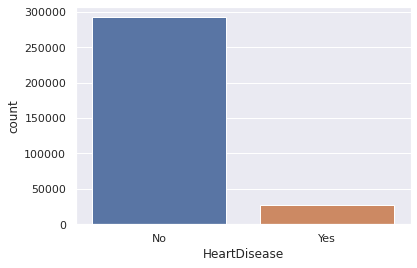

In [159]:
y = heart["HeartDisease"]

sns.countplot(y)


target_temp = heart["HeartDisease"].value_counts()

print(target_temp)

In [160]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/319795,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/319795,2)))

Percentage of patience without heart problems: 91.44
Percentage of patience with heart problems: 8.56


looking like we go a problem, the dataset is so imbalanced. Dataset contains 91.44% of "NO HeartDisease" and only 9.56% of heartDiease data

We can use oversampling or upsampling to overcome this problem
Upsampling or Oversampling refers to the technique to create artificial or duplicate data points or of the minority class sample to balance the class label. There are various oversampling techniques that can be used to create artificial data points.

In [161]:

#create two different dataframe of majority and minority class 
df_majority = heart[(heart['HeartDisease']=="No")] 
df_minority = heart[(heart['HeartDisease']=="Yes")] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 131177, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

No     292422
Yes    131177
Name: HeartDisease, dtype: int64


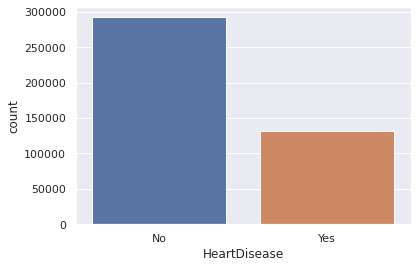

In [162]:
y = df_upsampled["HeartDisease"]

sns.countplot(y)


target_temp = df_upsampled["HeartDisease"].value_counts()

print(target_temp)

In [163]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/df_upsampled.shape[0],2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/df_upsampled.shape[0],2)))

Percentage of patience without heart problems: 69.03
Percentage of patience with heart problems: 30.97


In [164]:
for i in ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']:
    df_upsampled[i]=df_upsampled[i].map(dict(Yes=1, No=0))
df_upsampled = pd.get_dummies(data=df_upsampled, columns=['Sex','Race','AgeCategory','GenHealth','Diabetic'])
df_upsampled
#We converted the heartdisease column from yes/no to 1 and 0
#And added dummies to fix the imbalance of data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,PhysicalActivity,SleepTime,...,AgeCategory_80 or older,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
276535,1,35.43,0,1,1,0.0,0.0,1,0,12.0,...,1,0,0,1,0,0,1,0,0,0
183941,1,23.06,0,0,0,0.0,0.0,0,1,8.0,...,1,0,1,0,0,0,0,0,1,0
8829,1,23.49,1,0,0,5.0,0.0,0,1,7.0,...,1,0,1,0,0,0,0,0,1,0
60254,1,26.63,1,0,0,4.0,3.0,1,1,10.0,...,1,0,1,0,0,0,0,0,1,0
251583,1,28.07,0,1,0,0.0,0.0,0,1,8.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0.0,0.0,0,1,8.0,...,0,1,0,0,0,0,1,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,5.0,...,0,0,0,0,0,1,1,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,6.0,...,0,0,0,1,0,0,1,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,12.0,...,0,0,0,1,0,0,1,0,0,0


In [167]:
##split predictors and response variables 

X = df_upsampled.drop("HeartDisease",axis=1)
Y = df_upsampled["HeartDisease"]

scaler = MinMaxScaler(feature_range=(0, 1))
# learning the statistical parameters for each of the data and transforming
rescaledX = scaler.fit_transform(X)
rescaledX
#It is used on the training data so that we can scale the training data and also learn the scaling parameters.
#Here, the model built will learn the mean and variance of the featuresof the training set. These learned parameters
#are then further used to scale our test data

array([[0.28262707, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13328504, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.1384764 , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.14753109, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25099602, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41699867, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [168]:

##split train an test set by creating 80:20

X_train,X_test,Y_train,Y_test = train_test_split(rescaledX,Y,test_size=0.20,random_state=0)

In [169]:
print(X.shape,X_train.shape,X_test.shape,)

(423599, 42) (338879, 42) (84720, 42)


In [170]:
##fit  model with training dataset 
#applying Logistic Regression on Heartdisease Data.
lr = LogisticRegression()
##training model
lr.fit(X_train,Y_train)
##evaluating the model 
Y_pred_lr = lr.predict(X_test)

In [171]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 77.88 %


In [172]:
## random forest classifier 

max_accuracy = 0


for x in range(10):
    rf = RandomForestClassifier(random_state=x)
    ##training model
    rf.fit(X_train,Y_train)
    ##evaluating 
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [173]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random forest is: 95.39 %


In [174]:
scores = [score_lr,score_rf]
algorithms = ["Logistic Regression","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")


The accuracy score achieved using Logistic Regression is: 77.88 %
The accuracy score achieved using Random Forest is: 95.39 %


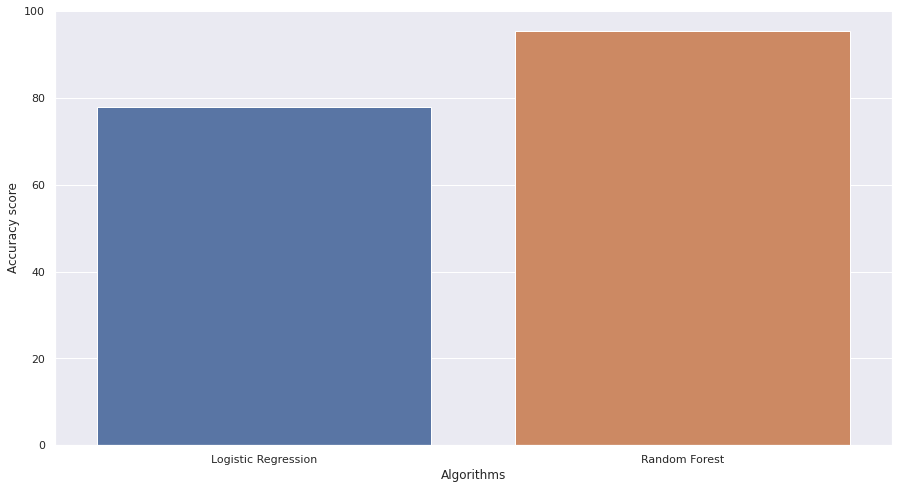

In [175]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)
#showing accuracy achived using different algorithms

In [188]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold
skf = KFold(n_splits=5, shuffle=True)

In [192]:
##cross validation  
accurecy_report = dict()
def trainwith(modelname):
    print(f'using model: {modelname} '.center(100,'='),'\n')
    idx = 0
    model_accurecy =[]
    for _train,_test in skf.split(X, Y):
        idx += 1
        print(f'Fold Number {idx} '.center(100,'='), '\n')
        modelname.fit(X.iloc[_train],Y.iloc[_train])
        print('Confusion Matrix'.center(80,'-'), '\n')
        ypred = modelname.predict(X.iloc[_test])
        print(confusion_matrix(Y.iloc[_test],ypred), '\n')
        print('Classification Report'.center(80,'-'), '\n')
        print(classification_report(Y.iloc[_test],ypred))
        model_accurecy.append(accuracy_score(Y.iloc[_test],ypred))
    print('='*100)
    print('The average accurecy of this model is {:.02f}%'.format(np.array(model_accurecy).mean()*100))
    accurecy_report[modelname] = round(np.array(model_accurecy).mean()*100,2)  

In [193]:
logReg = LogisticRegression(max_iter=1000)
trainwith(logReg)

==========================using model: LogisticRegression(max_iter=1000) =========================== 

===========================================Fold Number 1 =========================================== 

--------------------------------Confusion Matrix-------------------------------- 

[[52053  6563]
 [12104 14000]] 

-----------------------------Classification Report------------------------------ 

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     58616
           1       0.68      0.54      0.60     26104

    accuracy                           0.78     84720
   macro avg       0.75      0.71      0.72     84720
weighted avg       0.77      0.78      0.77     84720

===========================================Fold Number 2 =========================================== 

--------------------------------Confusion Matrix-------------------------------- 

[[51897  6611]
 [11990 14222]] 

-----------------------------Classification Repor

In [194]:
rf_model = RandomForestClassifier()
trainwith(rf_model)

===============================using model: RandomForestClassifier() =============================== 

===========================================Fold Number 1 =========================================== 

--------------------------------Confusion Matrix-------------------------------- 

[[55049  3422]
 [  619 25630]] 

-----------------------------Classification Report------------------------------ 

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     58471
           1       0.88      0.98      0.93     26249

    accuracy                           0.95     84720
   macro avg       0.94      0.96      0.95     84720
weighted avg       0.96      0.95      0.95     84720

===========================================Fold Number 2 =========================================== 

--------------------------------Confusion Matrix-------------------------------- 

[[55150  3486]
 [  546 25538]] 

-----------------------------Classification Repor

## random forest has good result as compare to other algorithms

featuer: 0, Score: 49.47500
featuer: 1, Score: 0.00000
featuer: 2, Score: -0.00000
featuer: 3, Score: 0.00000
featuer: 4, Score: 0.00000
featuer: 5, Score: 0.00000
featuer: 6, Score: 0.00000
featuer: 7, Score: -0.00000
featuer: 8, Score: -0.00000
featuer: 9, Score: 46.40216
featuer: 10, Score: 79.33023
featuer: 11, Score: 97.14084
featuer: 12, Score: -0.00000
featuer: 13, Score: 0.00000
featuer: 14, Score: -0.00000
featuer: 15, Score: 2.54289
featuer: 16, Score: -0.00000
featuer: 17, Score: 0.00000


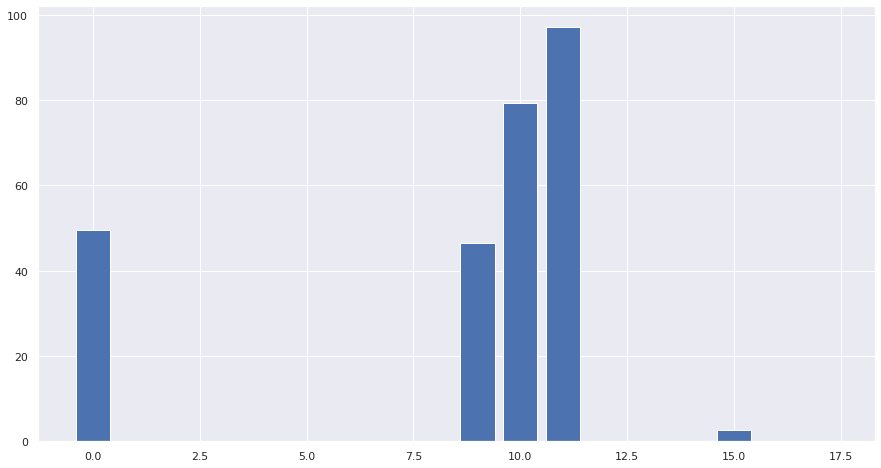

In [177]:
from tables.table import Column
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X_train,Y_train= make_regression(n_samples=1000, n_features=18, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X_train,Y_train)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('featuer: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
#to get to know the most important feature of the data.

In [198]:
#diabetic and race are most important features.
heart.corr()
# to show co=realtions of features on each other.

""


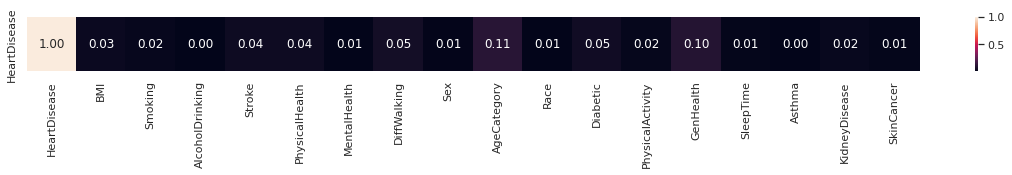

In [179]:

import math 
import scipy.stats as ss #math operations
from collections import Counter
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy


def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x   
theilu = pd.DataFrame(index=['HeartDisease'])
columns = heart.columns
for j in range(0,len(columns)):
    u = theil_u(heart['HeartDisease'].tolist(),heart[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()
# predicting amount of information present in the different features of data